<a href="https://www.kaggle.com/code/divyanshuyadavdev/my-neural-net-on-iris?scriptVersionId=291743710" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
#print categorical data and unique values
df.columns
for col in df.columns:
    print(f"{col}: {len(df[col].unique())}")
df['Species'].unique()

Id: 150
SepalLengthCm: 35
SepalWidthCm: 23
PetalLengthCm: 43
PetalWidthCm: 22
Species: 3


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
#how many values are specific value in a Series
(df['Species'] == 'Iris-setosa').sum()

np.int64(50)

In [6]:
#Print no of row for each categorical values
for sp in df['Species'].unique():
    print(f"{sp}: {(df['Species']==sp).sum()}")

Iris-setosa: 50
Iris-versicolor: 50
Iris-virginica: 50


In [7]:
#drop uneccesaary Id column
df_dropped = df.drop(columns = ['Id'])
df_dropped

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
# shuffling of dataframe
df_shuffled = df_dropped.sample(frac = 1, random_state = 1)
df_shuffled

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,5.8,4.0,1.2,0.2,Iris-setosa
98,5.1,2.5,3.0,1.1,Iris-versicolor
75,6.6,3.0,4.4,1.4,Iris-versicolor
16,5.4,3.9,1.3,0.4,Iris-setosa
131,7.9,3.8,6.4,2.0,Iris-virginica
...,...,...,...,...,...
133,6.3,2.8,5.1,1.5,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica
72,6.3,2.5,4.9,1.5,Iris-versicolor
140,6.7,3.1,5.6,2.4,Iris-virginica


In [9]:
#meta calculation
print(70/100 * 150)
30/100 * 150

105.0


45.0

In [10]:
# train test split
df_train = df_shuffled[:105]
df_test = df_shuffled[105:]
print(df_train.shape)
print(df_test.shape)

(105, 5)
(45, 5)


In [11]:
#TODO: add L2 regularisation
# REMEMBER: a bad learning rate or weight init or bias init can make even a good network perform worse
def train_model(dataset, epochs, eta , random_seed = 1, verbose = False): # (4+1) columns and some rows
    #imports
    import random
    import math
    
    
    #lists for visualisation (per epoch)
    epoch_list = []
    acc_list = []
    loss_list = []
    b1_list = []
    b2_list = []
    b3_list = []
    b4_list = []
    b5_list = []
    w1_list = []
    w2_list = []
    w3_list = []
    w4_list = []
    w5_list = []
    w6_list = []
    w7_list = []
    w8_list = []
    w9_list = []
    w10_list = []
    w11_list = []
    w12_list = []
    w13_list = []
    w14_list = []
    
    # parameters
    # bias
    b1 = 10
    b2 = 10
    b3 = 0
    b4 = 0
    b5 = 0
    if verbose:
        print(f"bias: {b1,b2,b3,b4,b5}")
    
    
    # weights
    random.seed(random_seed)
    limit = 1 # you may use Xavier init
    w1 = random.uniform(-limit, limit)
    w2 = random.uniform(-limit, limit)
    w3 = random.uniform(-limit, limit)
    w4 = random.uniform(-limit, limit)
    w5 = random.uniform(-limit, limit)
    w6 = random.uniform(-limit, limit)
    w7 = random.uniform(-limit, limit)
    w8 = random.uniform(-limit, limit)
    w9 = random.uniform(-limit, limit)
    w10 = random.uniform(-limit, limit)
    w11 = random.uniform(-limit, limit)
    w12 = random.uniform(-limit, limit)
    w13 = random.uniform(-limit, limit)
    w14 = random.uniform(-limit, limit)
    if verbose:
        print(f"weigts: {w1, w2,w3, w4, w5, w6, w7, w8,
        w9, w10, w11, w12, w13, w14}")

    for current_epoch in range(1, epochs+1):
        epoch_loss = 0
        accuracy = 0
        
        for row_idx in range(len(dataset)):            
            # input layer
            x1 = dataset['SepalLengthCm'].iloc[row_idx]
            x2 = dataset['SepalWidthCm'].iloc[row_idx]
            x3 = dataset['PetalLengthCm'].iloc[row_idx]
            x4 = dataset['PetalWidthCm'].iloc[row_idx]
            target = dataset['Species'].iloc[row_idx]
            if verbose:
                print(f"x1:{x1}, x2:{x2}, x3:{x3}, x4:{x4}, target:{target}")
                
            A_prime = (x1 * w1) + (x2 * w3) + (x3 * w5) + (x4 * w7) + b1
            B_prime = (x1 * w2) + (x2 * w4) + (x3 * w6) + (x4 * w8) + b2
            if verbose:
                print(f"A_prime:{A_prime}, B_prime:{B_prime}")
    
            # RELU
            A = max(0,A_prime)
            B = max(0,B_prime)
            if verbose:
                print(f"A:{A}, B:{B}")
    
            C = (A * w9) + (B * w12) + b3
            D = (A * w10) + (B * w13) + b4
            E = (A * w11) + (B * w14) + b5
            if verbose:
                print(f"C:{C}, D:{D}, E:{E} (no relu)")
    
            # Scores
            e_C = math.exp(C)
            e_D = math.exp(D)
            e_E = math.exp(E)
            P_c =  e_C / ( e_C + e_D + e_E )
            P_d = e_D / ( e_C + e_D + e_E )
            P_e = e_E / ( e_C + e_D + e_E )
            if verbose:
                print(f"P_c:{P_c}, P_d:{P_d}, P_e:{P_e}, SUM:{P_c + P_d + P_e}")
    
            # loss
            loss_i = 0
            class_id = np.argmax([P_c, P_d, P_e])
            
            # bias-gradient
            grad_b3 = P_c
            grad_b4 = P_d
            grad_b5 = P_e
    
            if target == 'Iris-setosa': #P_c
                loss_i = -1 * math.log(P_c)
                grad_b3 = P_c - 1
                accuracy = accuracy + 1 if class_id == 0 else accuracy + 0
                
            elif target == 'Iris-versicolor': #P_d
                loss_i = -1 * math.log(P_d)
                grad_b4 = P_d - 1
                accuracy = accuracy + 1 if class_id == 1 else accuracy + 0
                
            else:#Iris-verginica #P_e
                loss_i = -1 * math.log(P_e)
                grad_b5 = P_e - 1
                accuracy = accuracy + 1 if class_id == 2 else accuracy + 0

            epoch_loss += loss_i
            
            if verbose:
                print(f"LOSS_{row_idx + 1}:{loss_i:.3f}")
                print(f"grad_b3:{grad_b3}, grad_b4:{grad_b4}, grad_b5:{grad_b5} ", end="")
                
            grad_b1 = (0 if A_prime <= 0 else 1) * ( w9 * grad_b3  +  w10 * grad_b4  +  w11 * grad_b5 )
            grad_b2 = (0 if B_prime <= 0 else 1) * ( w12 * grad_b3  +  w13 * grad_b4  +  w14 * grad_b5 )
            if verbose:
                print(f"grad_b1:{grad_b1}, grad_b2:{grad_b2}")
    
            # weight-gradient
            grad_w1 = x1 * grad_b1
            grad_w2 = x1 * grad_b2
            grad_w3 = x2 * grad_b1
            grad_w4 = x2 * grad_b2
            grad_w5 = x3 * grad_b1
            grad_w6 = x3 * grad_b2
            grad_w7 = x4 * grad_b1
            grad_w8 = x4 * grad_b2
            grad_w9 = A * grad_b3
            grad_w10 = A * grad_b4
            grad_w11 = A * grad_b5
            grad_w12 = B * grad_b3
            grad_w13 = B * grad_b4
            grad_w14 = B * grad_b5
            if verbose:
                print(f"grad_w1:{grad_w1}, grad_w2:{grad_w2}, grad_w3:{grad_w3}, grad_w4:{grad_w4}, grad_w5{grad_w5}, grad_w6:{grad_w6
                }, grad_w7:{grad_w7}, grad_w8:{grad_w8}, grad_w9:{grad_w9}, grad_w10:{grad_w10}, grad_w11:{grad_w11}, grad_w12:{grad_w12
                }, grad_w13:{grad_w13}, grad_w14:{grad_w14}")
    
            # parameter update
            b1 -= eta * grad_b1
            b2 -= eta * grad_b2
            b3 -= eta * grad_b3
            b4 -= eta * grad_b4
            b5 -= eta * grad_b5
            if verbose:
                    print(f"new biases: {b1,b2,b3,b4,b5}")
            
            w1 -= eta * grad_w1
            w2 -= eta * grad_w2
            w3 -= eta * grad_w3
            w4 -= eta * grad_w4
            w5 -= eta * grad_w5
            w6 -= eta * grad_w6
            w7 -= eta * grad_w7
            w8 -= eta * grad_w8
            w9 -= eta * grad_w9
            w10 -= eta * grad_w10
            w11 -= eta * grad_w11
            w12 -= eta * grad_w12
            w13 -= eta * grad_w13
            w14 -= eta * grad_w14
            if verbose:
                print(f"new weigts: {w1, w2,w3, w4, w5, w6, w7, w8,
                w9, w10, w11, w12, w13, w14}")
                
        epoch_loss /= len(dataset)
        accuracy /= len(dataset)
        
        if (current_epoch % (epochs/10)) == 0:
            print(f"Epoch_{current_epoch} Loss:{epoch_loss}, Accuracy:{accuracy}")
            print("="*20)

        #shuffling
        dataset = dataset.sample(frac=1, random_state = random_seed)
    
        #list for visualisation
        b1_list.append(b1)
        b2_list.append(b2)
        b3_list.append(b3)
        b4_list.append(b4)
        b5_list.append(b5)
        w1_list.append(w1)
        w2_list.append(w2)
        w3_list.append(w3)
        w4_list.append(w4)
        w5_list.append(w5)
        w6_list.append(w6)
        w7_list.append(w7)
        w8_list.append(w8)
        w9_list.append(w9)
        w10_list.append(w10)
        w11_list.append(w11)
        w12_list.append(w12)
        w13_list.append(w13)
        w14_list.append(w14)
        epoch_list.append(current_epoch) #visualisation
        loss_list.append(epoch_loss) #visualisation
        acc_list.append(accuracy) #visualisation
        
    #Visualisations:
    # print(len(epoch_list))
    # print(len(b1_list))
    
    #Loss over Epochs
    plt.figure(figsize=(6, 4))
    plt.plot(epoch_list, loss_list)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss over Epochs")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    #Bias over epochs
    biases = [b1_list, b2_list, b3_list, b4_list, b5_list]

    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8), sharex=True)
    axes = axes.flatten()
    
    for i, bias in enumerate(biases):
        axes[i].plot(epoch_list, bias)
        axes[i].set_title(f"Bias {i+1}")
        axes[i].grid(True)
    
    # Remove unused subplot
    fig.delaxes(axes[-1])
    
    fig.supxlabel("Epochs")
    fig.supylabel("Bias Value")
    fig.suptitle("Bias Parameters over Epochs")
    plt.tight_layout()
    plt.show()

    
    #Weight over Epochs
    weights = [
        w1_list, w2_list, w3_list, w4_list, w5_list,
        w6_list, w7_list, w8_list, w9_list, w10_list,
        w11_list, w12_list, w13_list, w14_list
    ]
    
    rows, cols = 4, 4
    fig, axes = plt.subplots(rows, cols, figsize=(14, 10), sharex=True)
    axes = axes.flatten()
    
    for i, weight in enumerate(weights):
        axes[i].plot(epoch_list, weight)
        axes[i].set_title(f"W{i+1}", fontsize=9)
        axes[i].grid(True)
    
    # Remove extra empty subplots
    for j in range(len(weights), len(axes)):
        fig.delaxes(axes[j])
    
    fig.supxlabel("Epochs")
    fig.supylabel("Weight Value")
    fig.suptitle("Weight Parameters over Epochs")
    plt.tight_layout()
    plt.show()

    
    return (b1,b2,b3,b4,b5,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14)
    

In [12]:
def test_model(dataset, param , verbose = False): # (4+1) columns and some rows
    #imports
    import math
    
    # parameters
    # bias
    b1 = param[0]
    b2 = param[1]
    b3 = param[2]
    b4 = param[3]
    b5 = param[4]
    if verbose:
        print(f"bias: {b1,b2,b3,b4,b5}")
        
    # weights
    w1 = param[5]
    w2 = param[6]
    w3 = param[7]
    w4 = param[8]
    w5 = param[9]
    w6 = param[10]
    w7 = param[11]
    w8 = param[12]
    w9 = param[13]
    w10 = param[14]
    w11 = param[15]
    w12 = param[16]
    w13 = param[17]
    w14 = param[18]
    if verbose:
        print(f"weigts: {w1, w2,w3, w4, w5, w6, w7, w8,
        w9, w10, w11, w12, w13, w14}")
    
    test_loss = 0
    accuracy = 0

    for row_idx in range(len(dataset)):            
        # input layer
        x1 = dataset['SepalLengthCm'].iloc[row_idx]
        x2 = dataset['SepalWidthCm'].iloc[row_idx]
        x3 = dataset['PetalLengthCm'].iloc[row_idx]
        x4 = dataset['PetalWidthCm'].iloc[row_idx]
        target = dataset['Species'].iloc[row_idx]
        if verbose:
            print(f"x1:{x1}, x2:{x2}, x3:{x3}, x4:{x4}, target:{target}")
            
        A_prime = (x1 * w1) + (x2 * w3) + (x3 * w5) + (x4 * w7) + b1
        B_prime = (x1 * w2) + (x2 * w4) + (x3 * w6) + (x4 * w8) + b2
        if verbose:
            print(f"A_prime:{A_prime}, B_prime:{B_prime}")

        # RELU
        A = max(0,A_prime)
        B = max(0,B_prime)
        if verbose:
            print(f"A:{A}, B:{B}")

        C = (A * w9) + (B * w12) + b3
        D = (A * w10) + (B * w13) + b4
        E = (A * w11) + (B * w14) + b5
        if verbose:
            print(f"C:{C}, D:{D}, E:{E} (no relu)")

        # Scores
        e_C = math.exp(C)
        e_D = math.exp(D)
        e_E = math.exp(E)
        P_c =  e_C / ( e_C + e_D + e_E )
        P_d = e_D / ( e_C + e_D + e_E )
        P_e = e_E / ( e_C + e_D + e_E )
        if verbose:
            print(f"P_c:{P_c}, P_d:{P_d}, P_e:{P_e}, SUM:{P_c + P_d + P_e}")

        # loss
        loss_i = 0
        class_id = np.argmax([P_c, P_d, P_e])


        if target == 'Iris-setosa': #P_c
            loss_i = -1 * math.log(P_c)
            accuracy = accuracy + 1 if class_id == 0 else accuracy + 0

        elif target == 'Iris-versicolor': #P_d
            loss_i = -1 * math.log(P_d)
            accuracy = accuracy + 1 if class_id == 1 else accuracy + 0
            
        else:#Iris-verginica #P_e
            loss_i = -1 * math.log(P_e)
            accuracy = accuracy + 1 if class_id == 2 else accuracy + 0

        if verbose:
            print(f"LOSS_{row_idx + 1}:{loss_i:.3f}")
            
        test_loss += loss_i
        
            
    test_loss /= len(dataset)
    accuracy /= len(dataset)
    print(f"Test Loss:{test_loss}, Accuracy:{accuracy}")
    print("="*20)
    


In [13]:
def predict(x1, x2, x3, x4, param, verbose=False):
    #imports
    import math
    
    # parameters
    # bias
    b1 = param[0]
    b2 = param[1]
    b3 = param[2]
    b4 = param[3]
    b5 = param[4]
    if verbose:
        print(f"bias: {b1,b2,b3,b4,b5}")
        
    # weights
    w1 = param[5]
    w2 = param[6]
    w3 = param[7]
    w4 = param[8]
    w5 = param[9]
    w6 = param[10]
    w7 = param[11]
    w8 = param[12]
    w9 = param[13]
    w10 = param[14]
    w11 = param[15]
    w12 = param[16]
    w13 = param[17]
    w14 = param[18]
    if verbose:
        print(f"weigts: {w1, w2,w3, w4, w5, w6, w7, w8,
        w9, w10, w11, w12, w13, w14}")
    

    if verbose:
        print(f"x1:{x1}, x2:{x2}, x3:{x3}, x4:{x4}")
        
    A_prime = (x1 * w1) + (x2 * w3) + (x3 * w5) + (x4 * w7) + b1
    B_prime = (x1 * w2) + (x2 * w4) + (x3 * w6) + (x4 * w8) + b2
    if verbose:
        print(f"A_prime:{A_prime}, B_prime:{B_prime}")

    # RELU
    A = max(0,A_prime)
    B = max(0,B_prime)
    if verbose:
        print(f"A:{A}, B:{B}")

    C = (A * w9) + (B * w12) + b3
    D = (A * w10) + (B * w13) + b4
    E = (A * w11) + (B * w14) + b5
    if verbose:
        print(f"C:{C}, D:{D}, E:{E} (no relu)")

    # Scores
    e_C = math.exp(C)
    e_D = math.exp(D)
    e_E = math.exp(E)
    P_c =  e_C / ( e_C + e_D + e_E )
    P_d = e_D / ( e_C + e_D + e_E )
    P_e = e_E / ( e_C + e_D + e_E )
    if verbose:
        print(f"P_c:{P_c}, P_d:{P_d}, P_e:{P_e}, SUM:{P_c + P_d + P_e}")

    class_id = np.argmax([P_c, P_d, P_e])


    if class_id == 0: #P_c
        return "Iris-Setosa"

    elif class_id == 1: #P_d
        return "Iris-Versicolor"

    else:#Iris-verginica #P_e
        return "Iris-Verginica"

Epoch_10 Loss:0.9386235855741436, Accuracy:0.45714285714285713
Epoch_20 Loss:0.7203091130969097, Accuracy:0.6
Epoch_30 Loss:0.4723517081189984, Accuracy:0.8857142857142857
Epoch_40 Loss:0.32256911430190255, Accuracy:0.9238095238095239
Epoch_50 Loss:0.2500928396198761, Accuracy:0.9523809523809523
Epoch_60 Loss:0.21209270781802222, Accuracy:0.9333333333333333
Epoch_70 Loss:0.18017532973844577, Accuracy:0.9714285714285714
Epoch_80 Loss:0.16586034840134664, Accuracy:0.9809523809523809
Epoch_90 Loss:0.15192486523081497, Accuracy:0.9619047619047619
Epoch_100 Loss:0.13727845619398535, Accuracy:0.9809523809523809


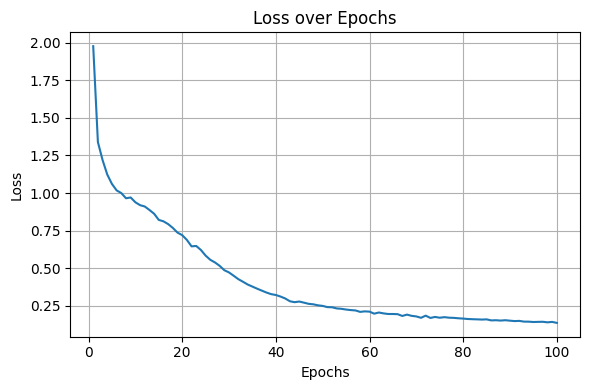

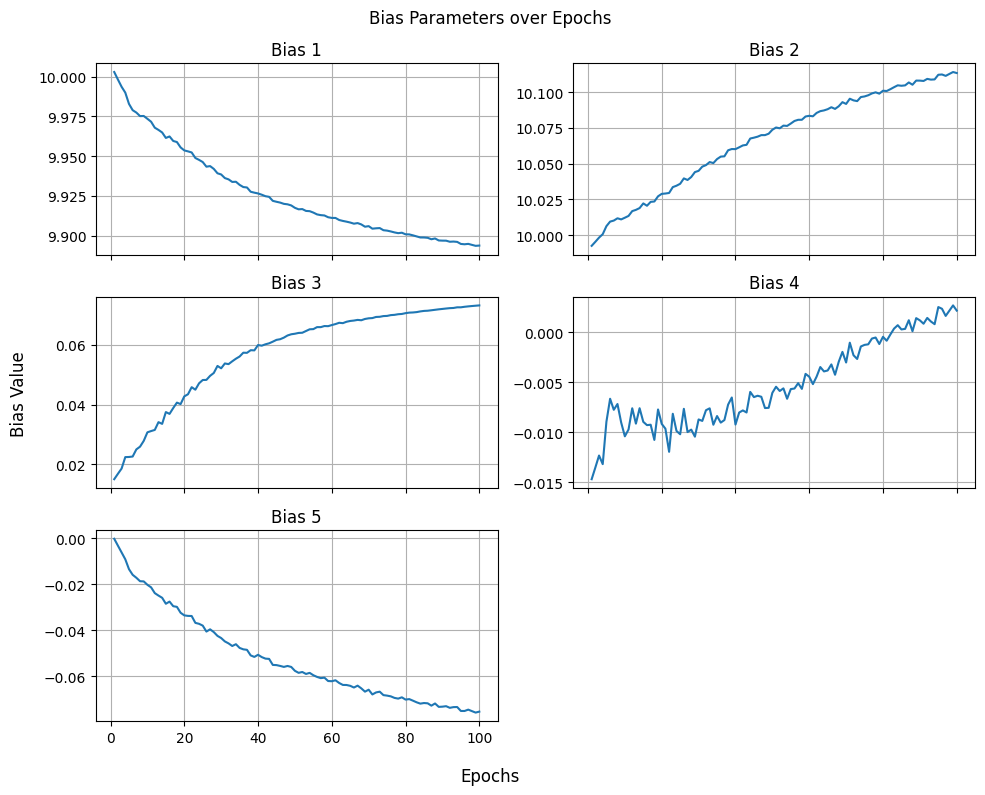

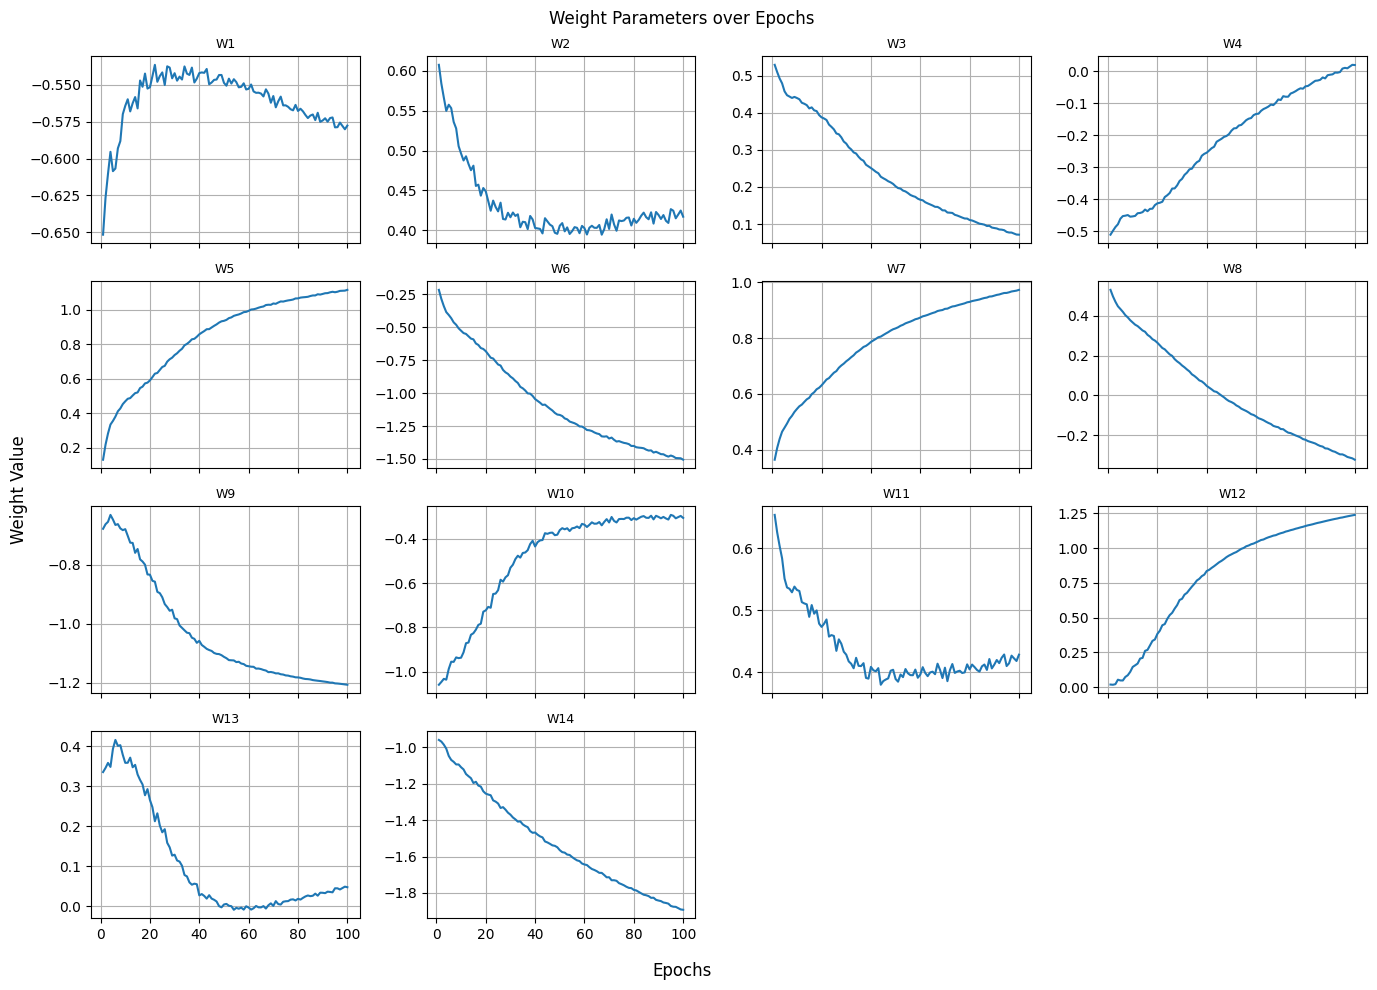

Test Loss:0.14383964179262623, Accuracy:0.9555555555555556


In [14]:
param = train_model(df_train, epochs = 100, eta = 1e-3, random_seed = 1, verbose = False)
test_model(df_test, param, verbose = False)

In [15]:
# sample inputs:
# 4.6  3.1  1.5  0.2  Iris_Setosa
# 6.2  3.4	5.4	 2.3  Iris-virginica

print(predict(x1=4.6, x2=3.1, x3=1.5, x4=0.2, param=param))
print(predict(x1=6.2, x2=3.4, x3=5.4, x4=02.3, param=param))

Iris-Setosa
Iris-Verginica
